In [1]:
import numpy as np
import pandas as pd
import pickle
import torch
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from skimage import io, transform
from torchvision import transforms, utils
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
import torch.optim as optim
import time

In [2]:
def loss_plot(train_loss,validation_loss, title=''):
    pr_freq = int(len(train_loss)/len(validation_loss))
    train_error = []
    for i in range(int(len(train_loss)/pr_freq)):
        batch_start = i * pr_freq
        batch_end = (i+1) * pr_freq
        train_error.append(np.average(train_loss[batch_start:batch_end]))

    val_error = [error for itr, error in validation_loss]
    df = pd.DataFrame({'train loss':train_error,
                       'validation loss':val_error
    })
    df = df.set_index((df.index+1)*pr_freq)

    sns.set_style("darkgrid")
    sns.set(rc={'figure.figsize':(18,8)})
    plt.xlabel("Iteration")
    plt.ylabel("MSE")
    ax = sns.lineplot(hue="event", style="event", marker='o',
                       markers=True, dashes=False, data=df).set_title(title)
    
def log_loss_plot(train_loss,validation_loss, title = ''):
    pr_freq = int(len(train_loss)/len(validation_loss))
    train_error = []
    for i in range(int(len(train_loss)/pr_freq)):
        batch_start = i * pr_freq
        batch_end = (i+1) * pr_freq
        train_error.append(np.average(train_loss[batch_start:batch_end]))

    val_error = [error for itr, error in validation_loss]
    log_train = np.log(train_error)
    log_val = np.log(val_error)
    log_df = pd.DataFrame({'train loss':log_train,
                       'validation loss':log_val
    })
    log_df = log_df.set_index((log_df.index+1)*pr_freq)

    sns.set_style("darkgrid")
    sns.set(rc={'figure.figsize':(14,8)})
    plt.xlabel("Iteration")
    plt.ylabel("Log MSE")
    ax = sns.lineplot(hue="event", style="event", marker='o',
                       markers=True, dashes=False, data=log_df).set_title(title)

def ME_loss_plot(train_loss,validation_loss, title = ''):
    pr_freq = int(len(train_loss)/len(validation_loss))
    train_error = []
    for i in range(int(len(train_loss)/pr_freq)):
        batch_start = i * pr_freq
        batch_end = (i+1) * pr_freq
        train_error.append(np.average(train_loss[batch_start:batch_end]))

    val_error = [error for itr, error in validation_loss]
    train_ME = np.sqrt(train_error)
    val_ME = np.sqrt(val_error)
    print('min mean val error: ' + str(np.min(val_ME)))
    df = pd.DataFrame({'train loss':train_ME,
                       'validation loss':val_ME
    })
    df = df.set_index((df.index+1)*pr_freq)

    sns.set_style("darkgrid")
    sns.set(rc={'figure.figsize':(16,8)})
    plt.xlabel("Iteration")
    plt.ylabel("ME")
    ax = sns.lineplot(hue="event", style="event", marker='o',
                       markers=True, dashes=False, data=df).set_title(title)

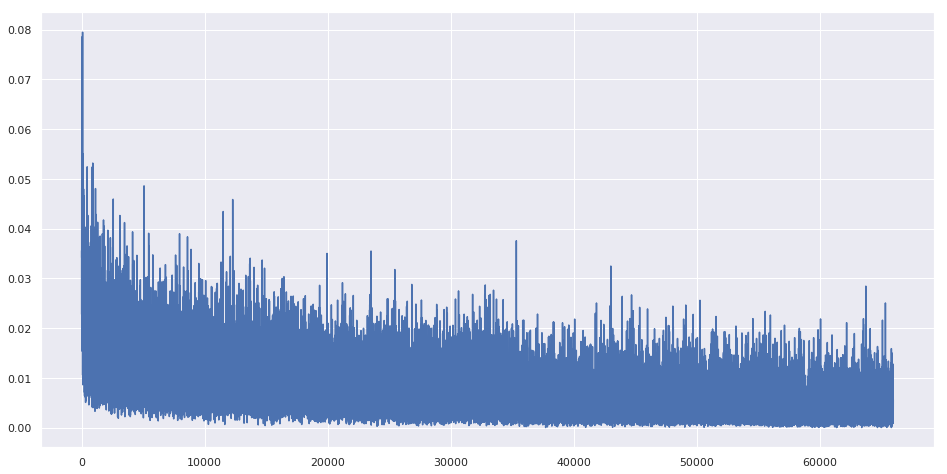

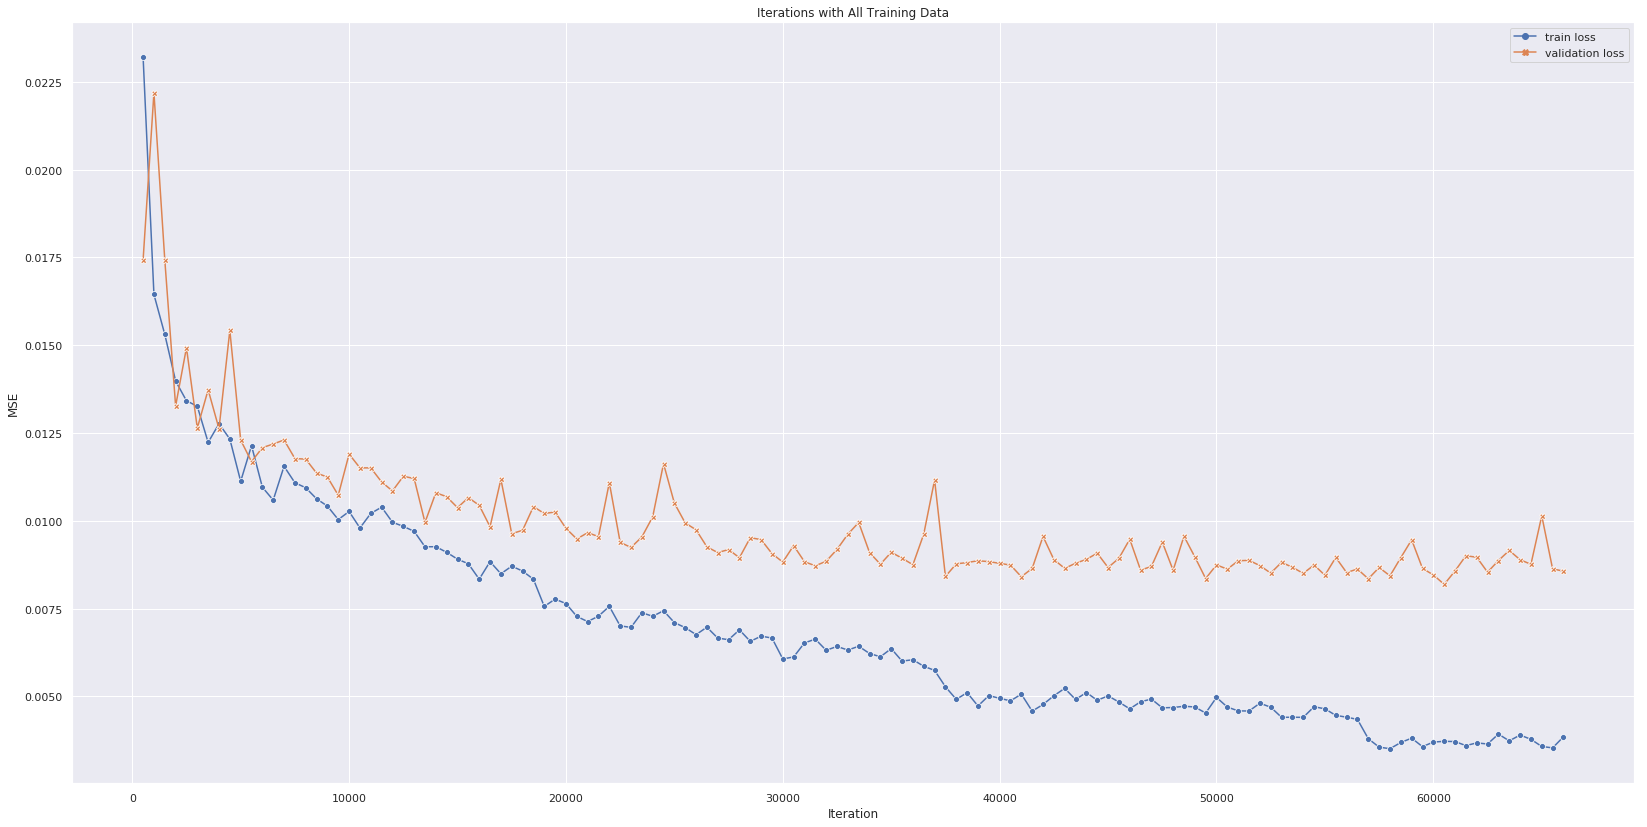

min mean val error: 0.09050861723900273


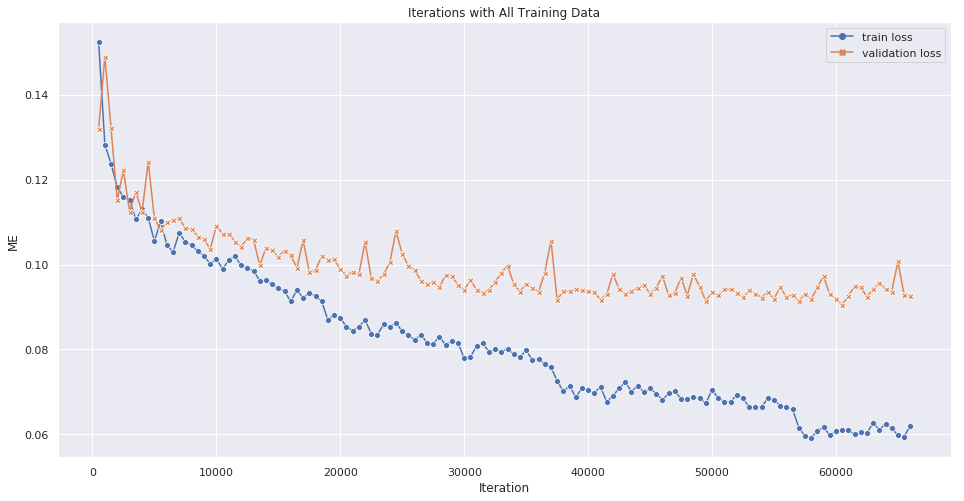

In [15]:
def show_all_plots(path, ME_plot=False, log_plot = False, title=''):
    if title == '':
        title = path
    checkpoint = torch.load(path)
    train_loss = checkpoint['train_loss']
    validation_loss = checkpoint['validation_loss']
    plt.plot(train_loss)
    plt.show()
    loss_plot(train_loss,validation_loss,title)
    if(log_plot):
        plt.show()
        log_loss_plot(train_loss,validation_loss,title)
    if(ME_plot):
        plt.show()
        ME_loss_plot(train_loss,validation_loss,title)
        
show_all_plots('models/model_v3.3_full_data_iter66000.pt', ME_plot = True, title='Iterations with All Training Data')

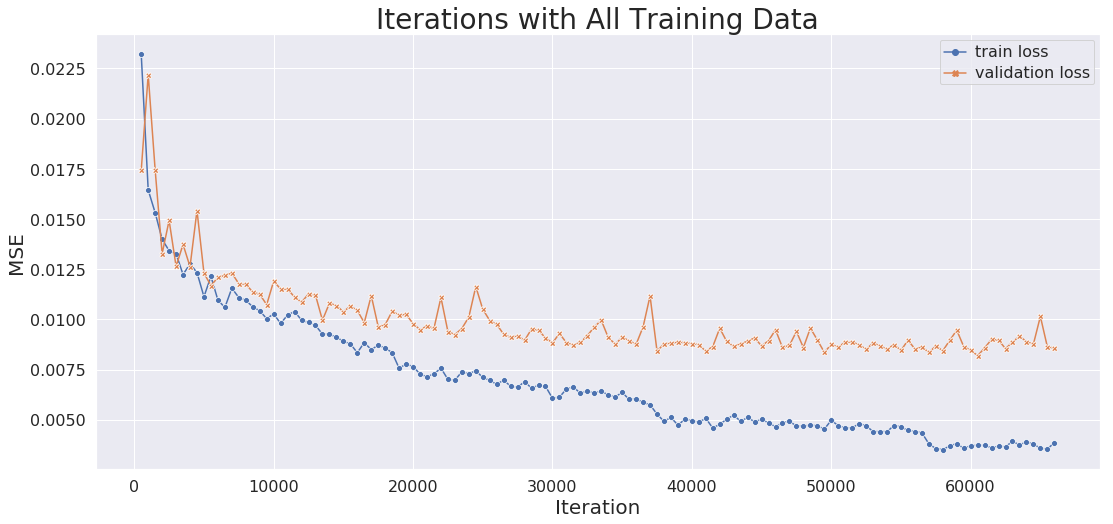

In [14]:
def poster_plot(path, title=''):
    train_error = []
    if title == '':
        title = path
    checkpoint = torch.load(path)
    train_loss = checkpoint['train_loss']
    validation_loss = checkpoint['validation_loss']
    pr_freq = int(len(train_loss)/len(validation_loss))

    
    for i in range(int(len(train_loss)/pr_freq)):
        batch_start = i * pr_freq
        batch_end = (i+1) * pr_freq
        train_error.append(np.average(train_loss[batch_start:batch_end]))

    val_error = [error for itr, error in validation_loss]
    df = pd.DataFrame({'train loss':train_error,
                       'validation loss':val_error
    })
    df = df.set_index((df.index+1)*pr_freq)

    sns.set_style("darkgrid")
    sns.set(rc={'figure.figsize':(18,8)})
    plt.xlabel("Iteration")
    plt.ylabel("MSE")
    ax = sns.lineplot(hue="event", style="event", marker='o',
                       markers=True, dashes=False, data=df)
    plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
    ax.axes.set_title(title,fontsize=28)
    ax.set_xlabel("Iteration",fontsize=20)
    ax.set_ylabel("MSE",fontsize=20)
    ax.tick_params(labelsize=16)
    
poster_plot('models/model_v3.3_full_data_iter66000.pt', title='Iterations with All Training Data')

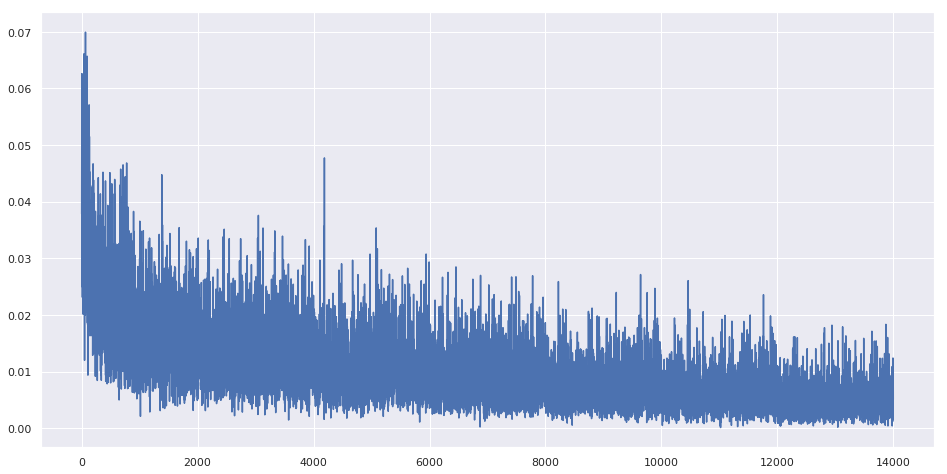

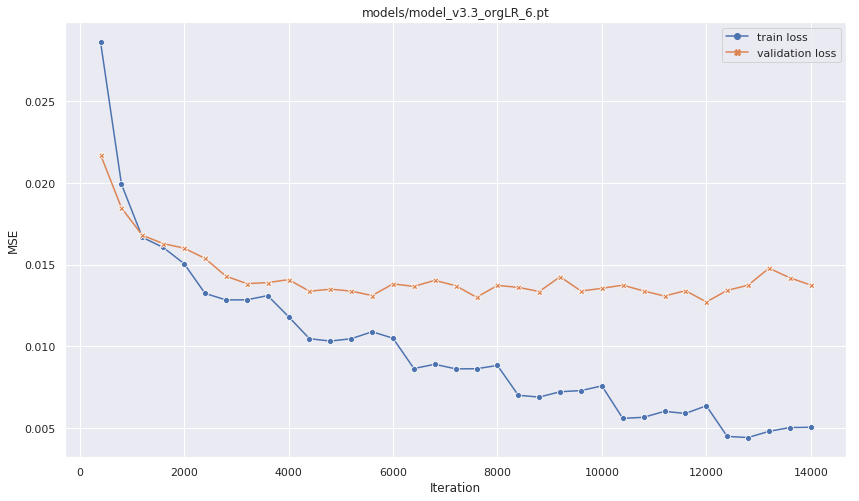

min mean val error: 0.11275309018729003


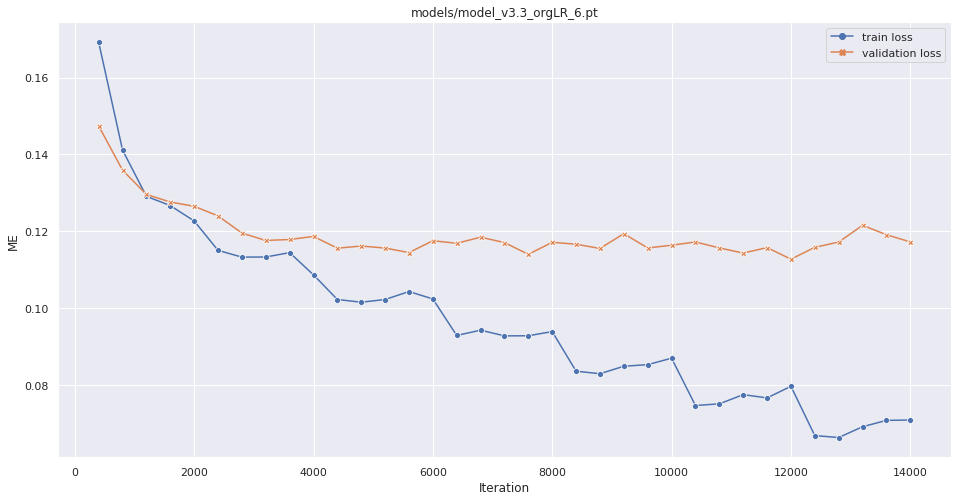

In [49]:
show_all_plots('models/model_v3.3_orgLR_6.pt', ME_plot = True)

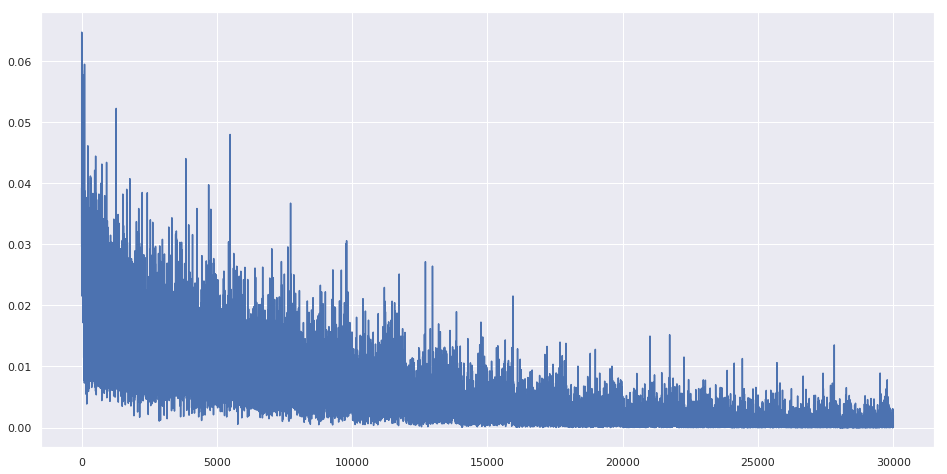

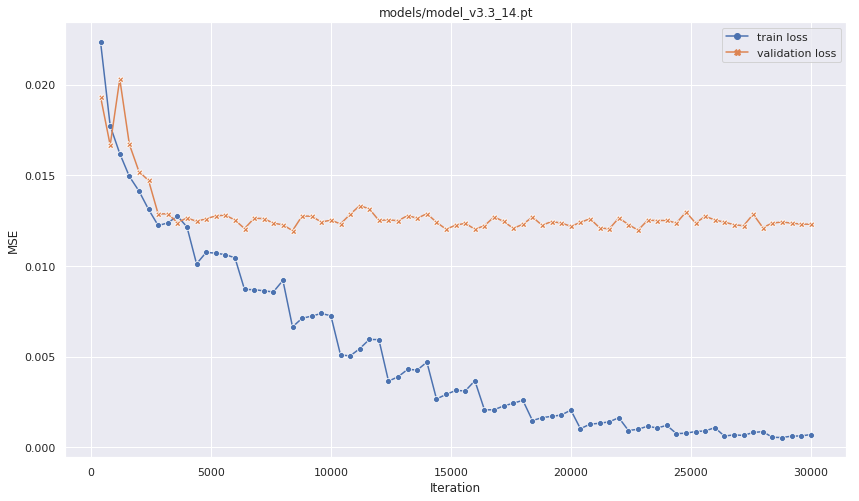

min mean val error: 0.10930819622923367


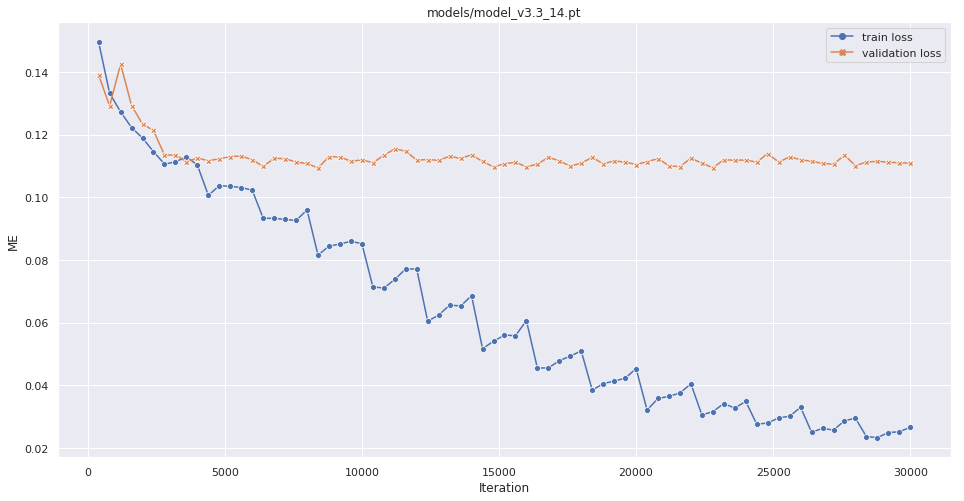

In [22]:
show_all_plots('models/model_v3.3_14.pt', ME_plot = True)

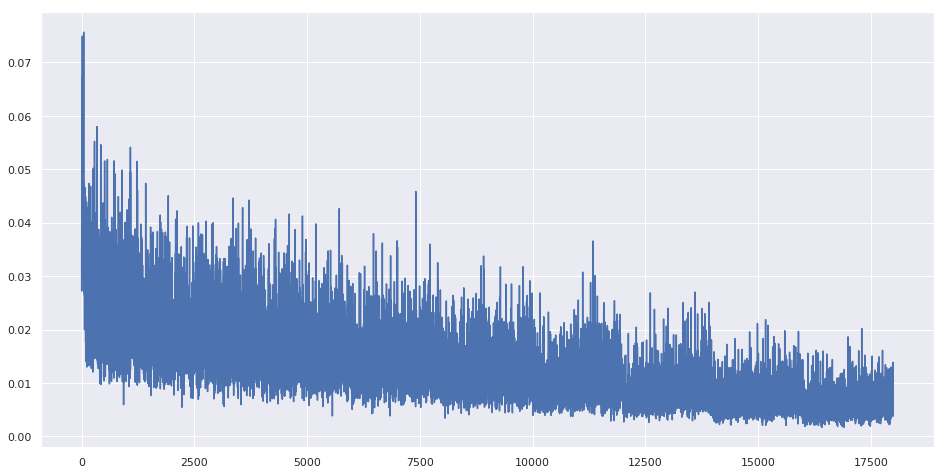

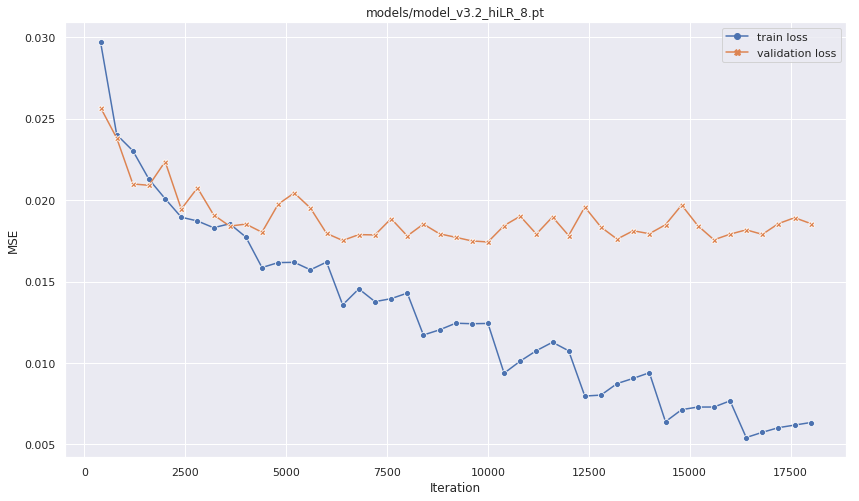

min mean val error: 0.13202236477345064


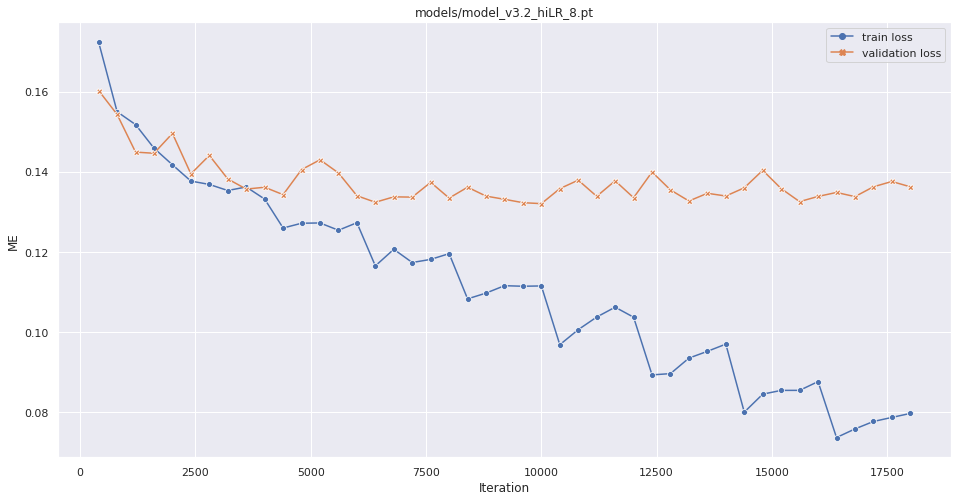

In [26]:
show_all_plots('models/model_v3.2_hiLR_8.pt', ME_plot = True)

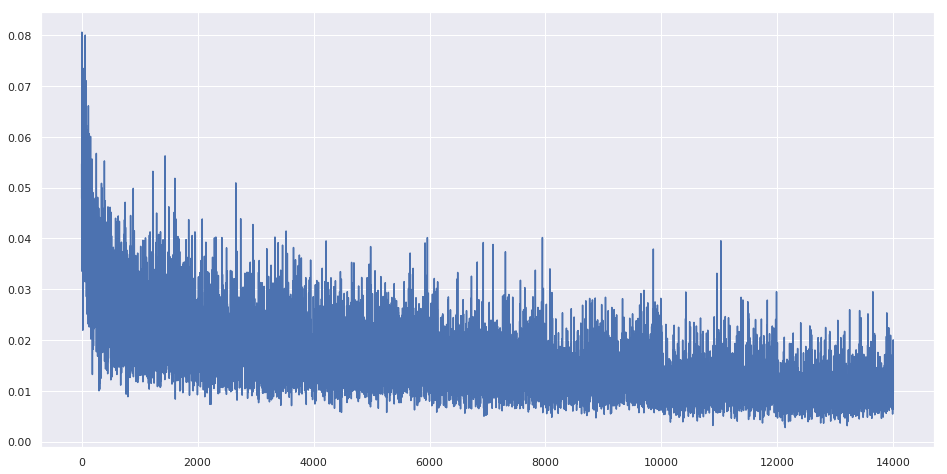

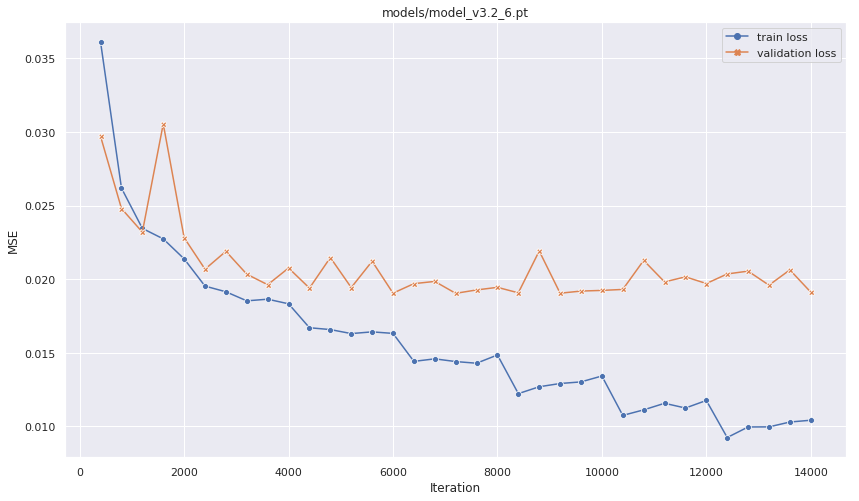

min mean val error: 0.1379981005907916


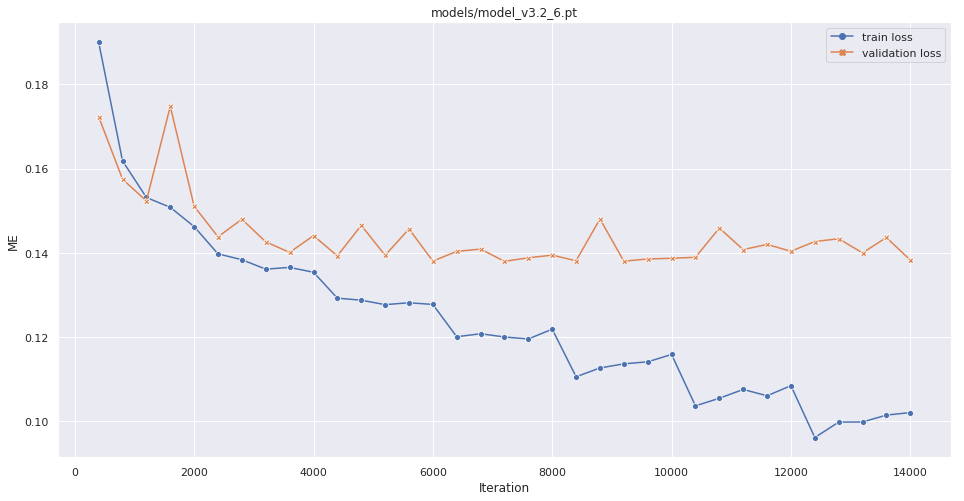

In [28]:
show_all_plots('models/model_v3.2_6.pt', ME_plot = True)

In [1]:
show_all_plots('models/model_v3.3_full_data_iter66000.pt', ME_plot = True, title='Iterations with All Training Data')

NameError: name 'show_all_plots' is not defined

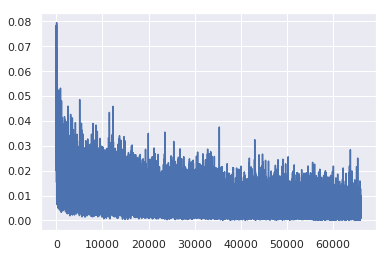

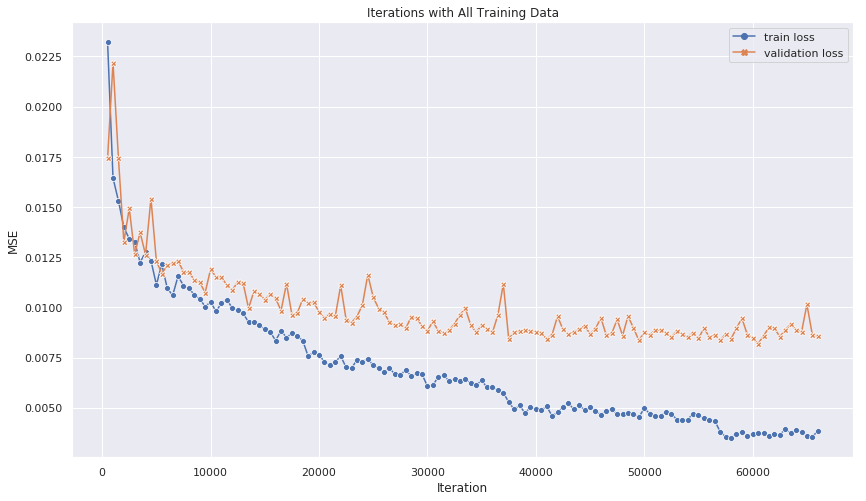

min mean val error: 0.09050861723900273


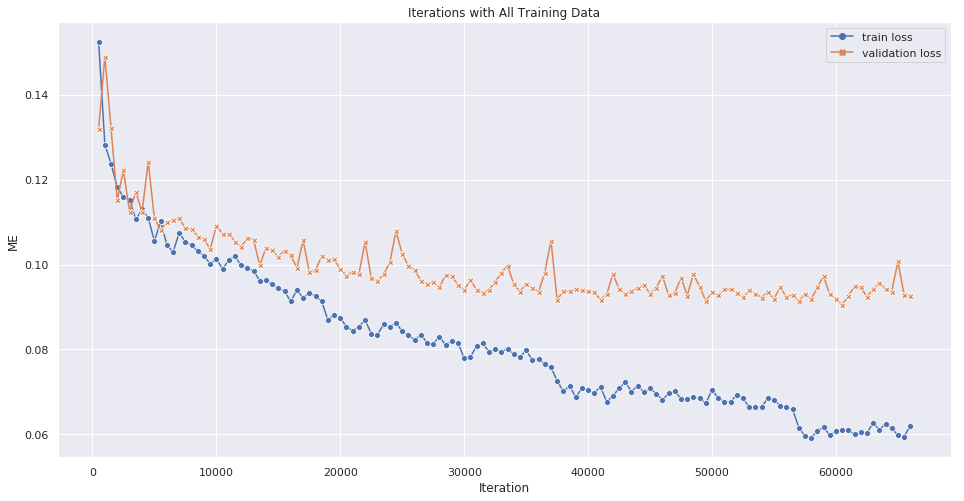

In [6]:
show_all_plots('models/model_v3.3_full_data_iter66000.pt', ME_plot = True, title='Iterations with All Training Data')

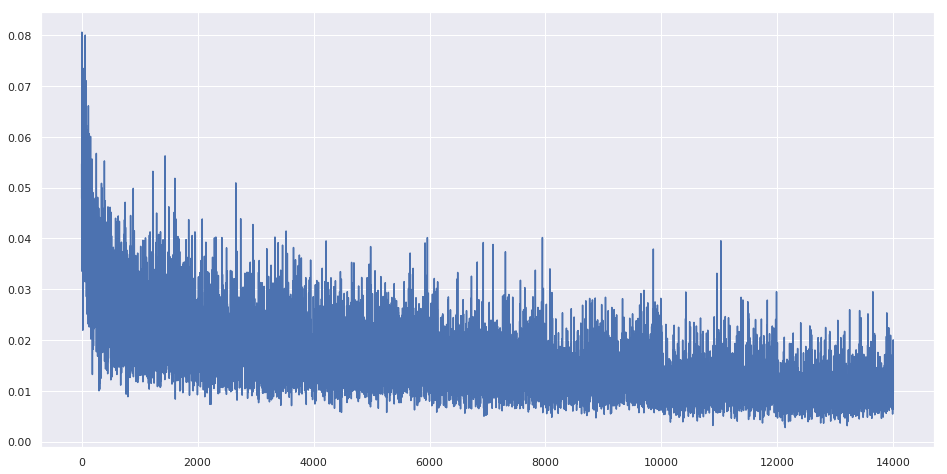

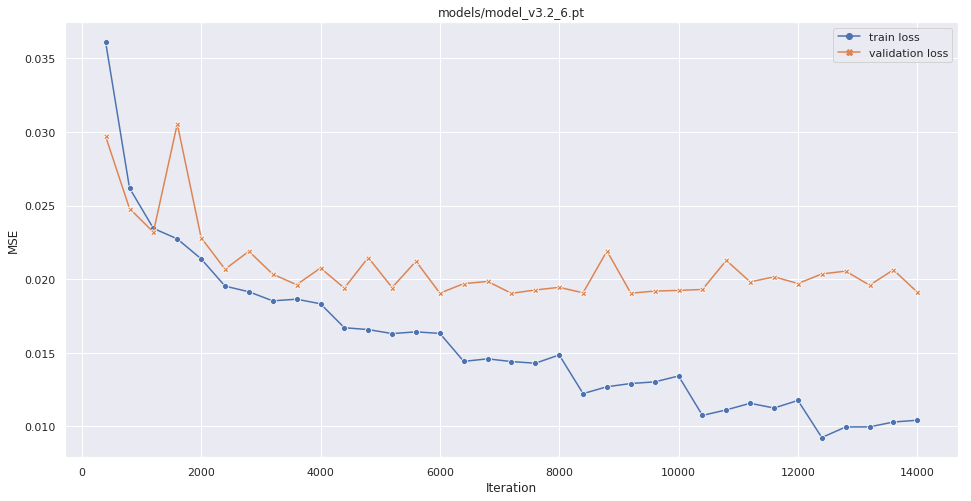

In [75]:
show_all_plots('models/model_v3.2_6.pt')

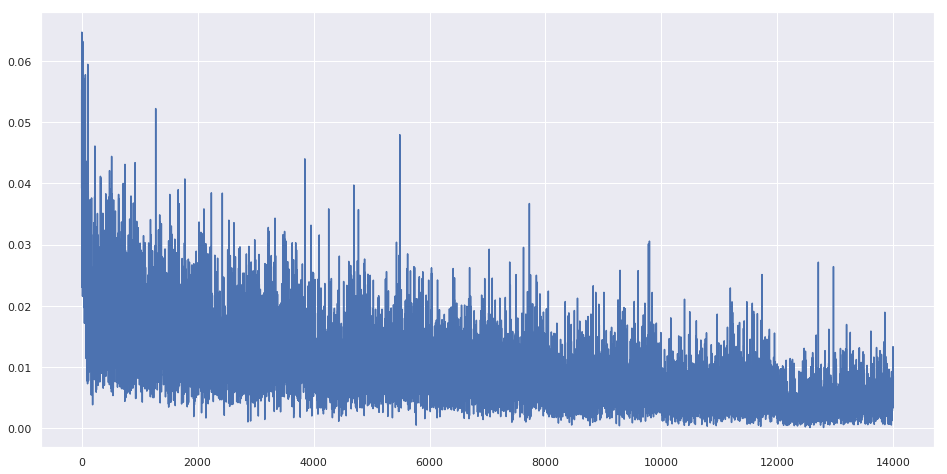

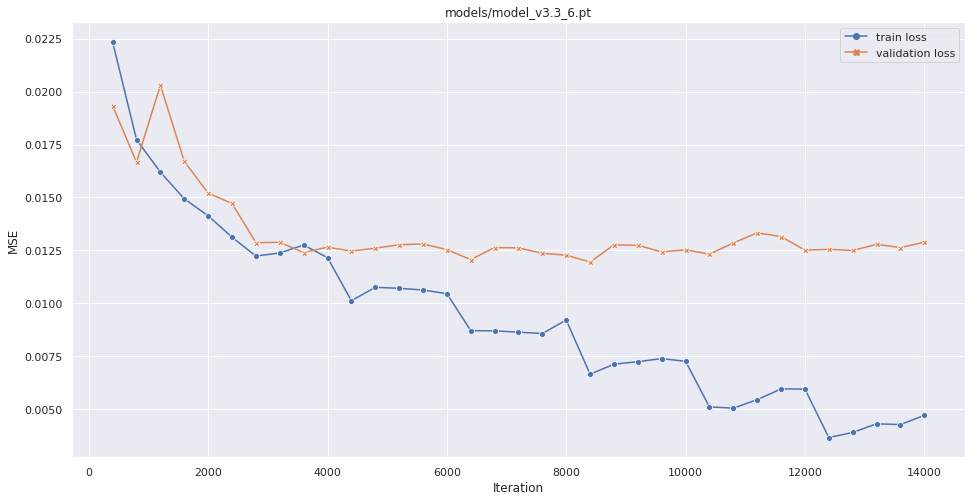

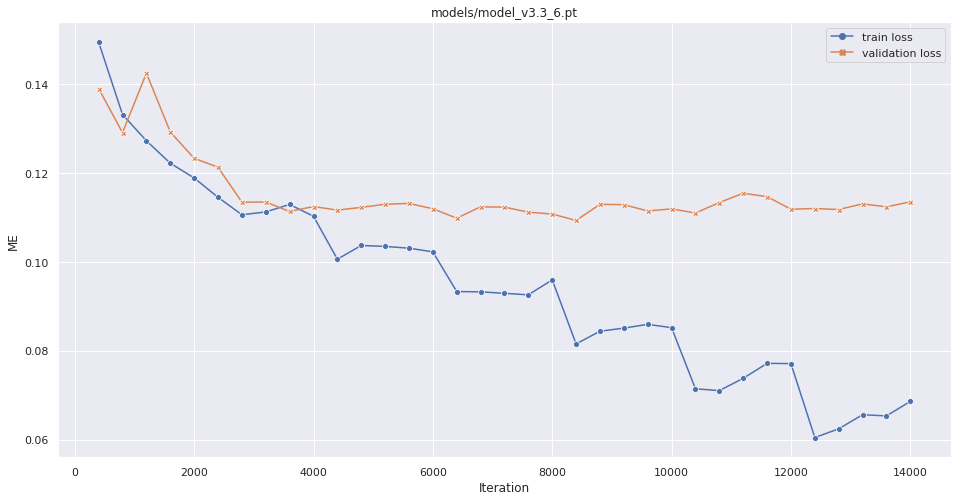

In [16]:
show_all_plots('models/model_v3.3_6.pt', ME_plot=True)

In [ ]:
show_all_plots('models/model_v3.3_6.pt', ME_plot=True)

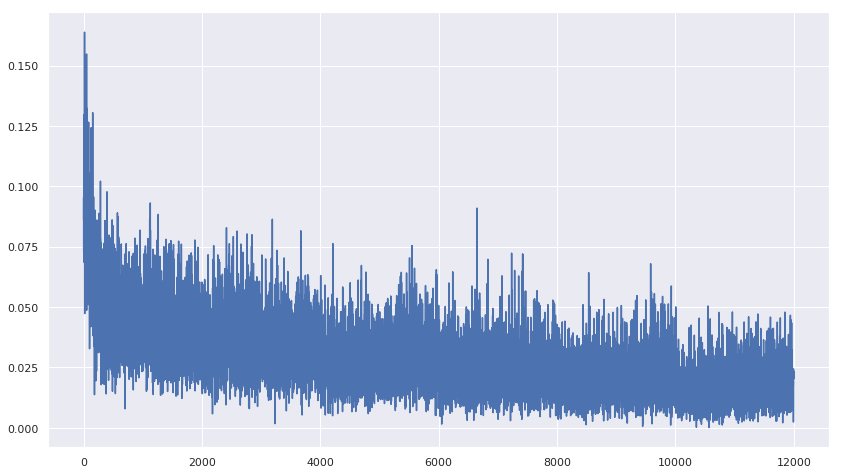

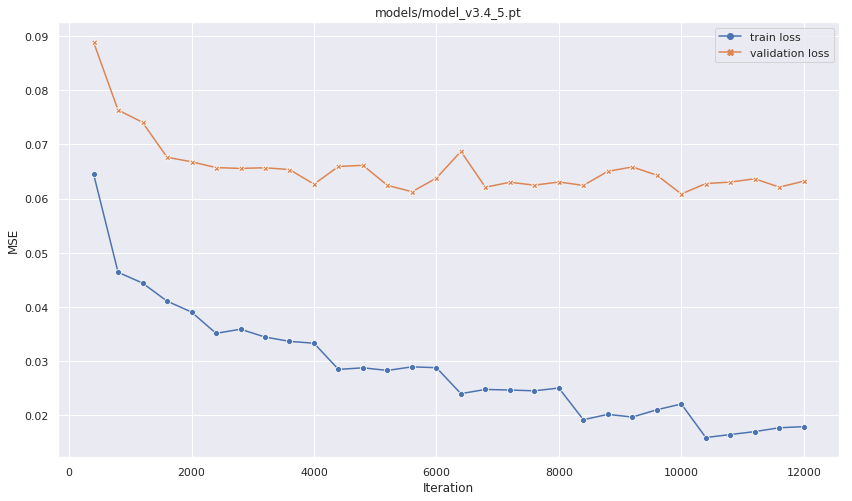

In [31]:
show_all_plots('models/model_v3.4_5.pt')

In [71]:
output.shape

torch.Size([1, 64, 5, 7])

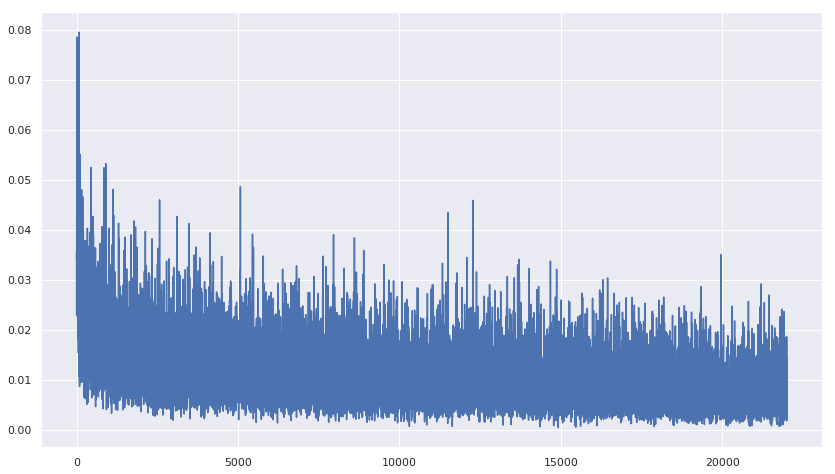

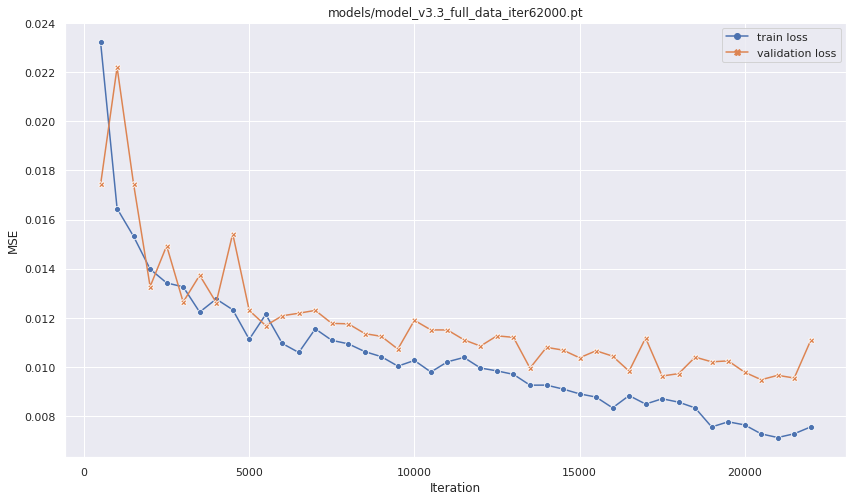

In [34]:
show_all_plots('models/model_v3.3_full_data_iter62000.pt')

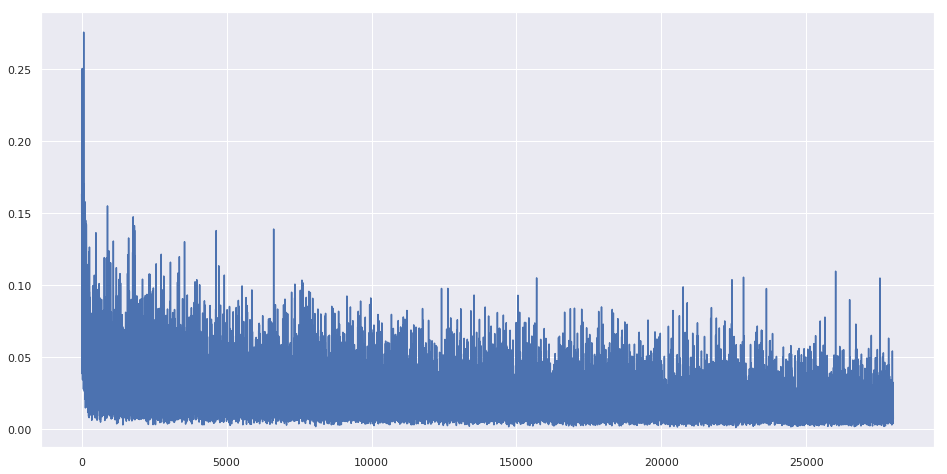

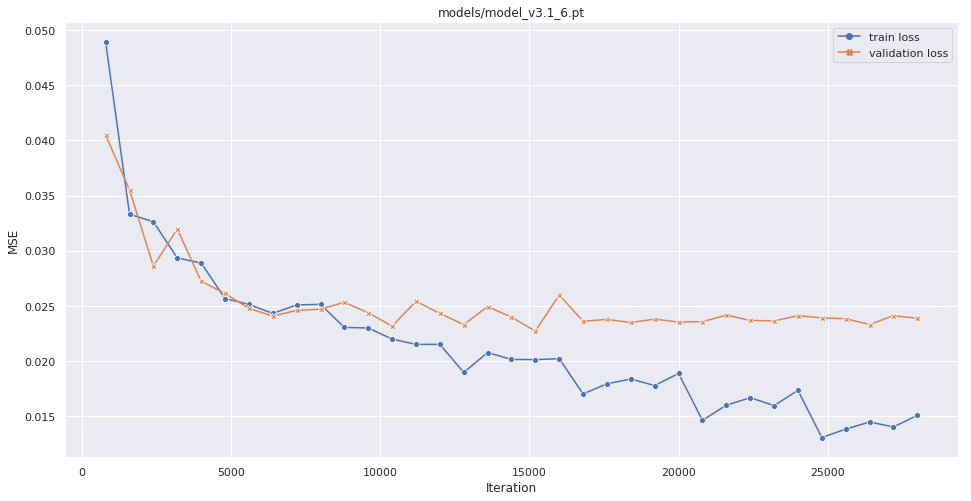

In [10]:
show_all_plots('models/model_v3.1_6.pt')